In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Reading the data
train = pd.read_csv('train.csv', index_col = 'PassengerId')
test = pd.read_csv('test.csv', index_col = 'PassengerId')


In [3]:
display(train.head(2))

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
display(test.head(2))

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [5]:
display(train.shape)

(891, 11)

In [6]:
display(test.shape)

(418, 10)

In [7]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


None

In [8]:
display(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


None

In [9]:
train['Title'] = train['Name'].str.rsplit(',').str[1]
train['Title'] = train['Title'].str.rsplit('.').str[0]

test['Title'] = test['Name'].str.rsplit(',').str[1]
test['Title'] = test['Title'].str.rsplit('.').str[0]

display(train['Title'].value_counts())
display(test['Title'].value_counts())

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: Title, dtype: int64

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Ms          1
 Dr          1
 Dona        1
Name: Title, dtype: int64

In [10]:
common = [' Mr',' Miss',' Mrs',' Mlle',' Ms',' Mme',' Don',' Dona']

for i, row in train.iterrows():
    if row['Title'] in common:
            train.loc[i,'Title'] = 'Common'
    else:
        train.loc[i,'Title'] = 'Uncommon'

for i, row in test.iterrows():
    if row['Title'] in common:
        test.loc[i,'Title'] = 'Common'
    else:
        test.loc[i,'Title'] = 'Uncommon'

display(train['Title'].value_counts())
display(test['Title'].value_counts())

Common      829
Uncommon     62
Name: Title, dtype: int64

Common      392
Uncommon     26
Name: Title, dtype: int64

In [11]:
train['FamSize'] = train['SibSp'] + train['Parch']
test['FamSize'] = test['SibSp'] + test['Parch']

display(train['FamSize'].describe())
display(test['FamSize'].describe())

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: FamSize, dtype: float64

count    418.000000
mean       0.839713
std        1.519072
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: FamSize, dtype: float64

In [12]:
train.drop(['Name','SibSp','Parch','Ticket','Cabin'], axis = 1, inplace = True)    #Droping unnecesary variables
test.drop(['Name','SibSp','Parch','Ticket','Cabin'], axis = 1, inplace = True)

display(train.head(2))
display(test.head(2))

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamSize
PassengerId,,,,,,,,
1,0,3,male,22.0,7.2500,S,Common,1
2,1,1,female,38.0,71.2833,C,Common,1


,Pclass,Sex,Age,Fare,Embarked,Title,FamSize
PassengerId,,,,,,,
892,3,male,34.5,7.8292,Q,Common,0
893,3,female,47.0,7.0000,S,Common,1


In [13]:
df = pd.concat([train,test])            #Handling missing values

display(df.info())
display(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   Fare      1308 non-null   float64
 5   Embarked  1307 non-null   object 
 6   Title     1309 non-null   object 
 7   FamSize   1309 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 92.0+ KB


None

(1309, 8)

C:\Users\Mansi\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


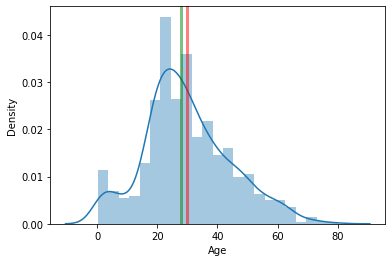

C:\Users\Mansi\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


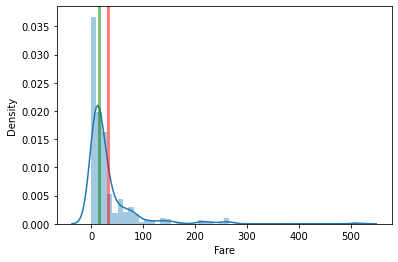

In [14]:
# Imputing meadian and mode in null values
mean_age = df['Age'].mean()
median_age = df['Age'].median()

sns.distplot(df['Age'])
plt.axvline(x=mean_age, linewidth=3, color='r', label="mean", alpha=0.5)
plt.axvline(x=median_age, linewidth=3, color='g', label="median", alpha=0.5)
plt.show()

mean_fare = df['Fare'].mean()
median_fare = df['Fare'].median()

sns.distplot(df['Fare'])
plt.axvline(x=mean_fare, linewidth=3, color='r', label="mean", alpha=0.5)
plt.axvline(x=median_fare, linewidth=3, color='g', label="median", alpha=0.5)
plt.show()

mode_embarked = df['Embarked'].mode()

df['Age'].fillna(value=median_age, inplace=True)
df['Fare'].fillna(value=median_fare, inplace=True)
df['Embarked'].fillna(value=mode_embarked[0], inplace=True)

In [15]:
display(df.info())           # No missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   Fare      1309 non-null   float64
 5   Embarked  1309 non-null   object 
 6   Title     1309 non-null   object 
 7   FamSize   1309 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 92.0+ KB


None

In [16]:
train = df.iloc[0:891,:]
test = df.iloc[891:1309,:].drop('Survived',axis = 1)                            # splitting the Data again
display(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   Title     891 non-null    object 
 7   FamSize   891 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 62.6+ KB


None

In [17]:
categoricals = []
numericals = []
for column in train.columns.drop('Survived'):
    if train[column].dtype == 'object':
        categoricals.append(train[column].name)
    else:
        numericals.append(train[column].name)
print(categoricals, '\n', numericals)

['Sex', 'Embarked', 'Title'] 
 ['Pclass', 'Age', 'Fare', 'FamSize']


In [18]:
train_categorical = train[train.columns.intersection(categoricals)]
train_categorical['Pclass'] = train['Pclass']
train_categorical['FamSize'] = train['FamSize']

display(train_categorical.head(2))

C:\Users\Mansi\AppData\Local\Temp/ipykernel_13684/3938469235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_categorical['Pclass'] = train['Pclass']
C:\Users\Mansi\AppData\Local\Temp/ipykernel_13684/3938469235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_categorical['FamSize'] = train['FamSize']


,Sex,Embarked,Title,Pclass,FamSize
PassengerId,,,,,
1,male,S,Common,3,1
2,female,C,Common,1,1


In [19]:
train_numerical = train[train.columns.intersection(numericals)].drop(['Pclass', 'FamSize'],axis = 1)
display(train_numerical.head(2))

,Age,Fare
PassengerId,,
1,22.0,7.2500
2,38.0,71.2833


C:\Users\Mansi\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


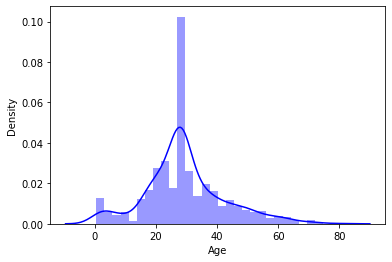

C:\Users\Mansi\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


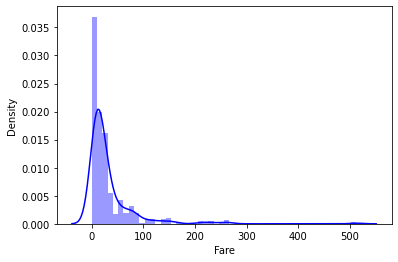

In [20]:
for col_name in train_numerical:
    sns.distplot(train_numerical.loc[:,col_name], color="b")
    plt.show()

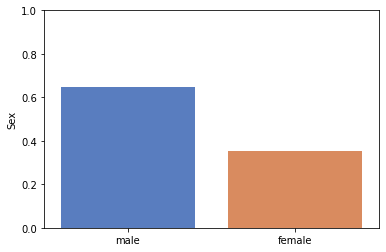

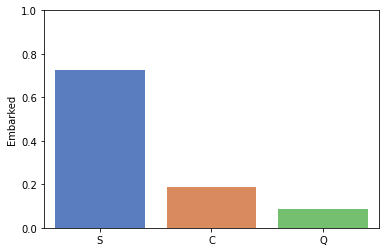

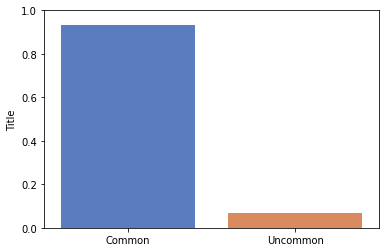

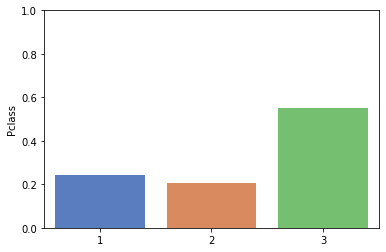

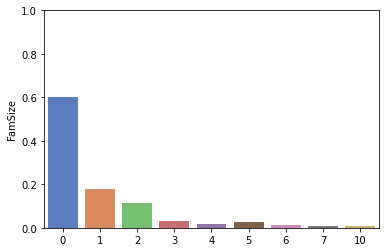

In [21]:
for col_name in train_categorical.columns:
    percent = train_categorical.loc[:,col_name].value_counts(normalize = True)
    
    fig, ax = plt.subplots()
    sns.barplot(x = percent.index, y = percent, palette = 'muted').set(ylim=(0,1))     
    plt.show()

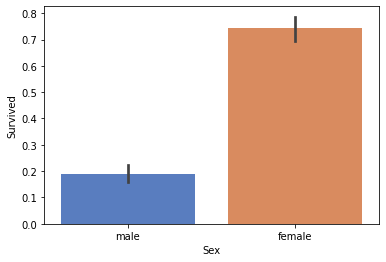

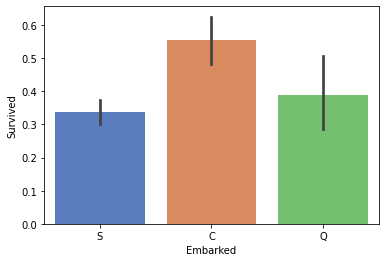

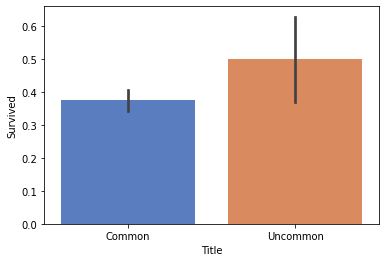

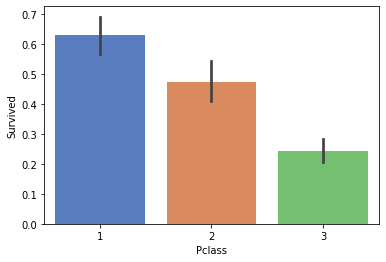

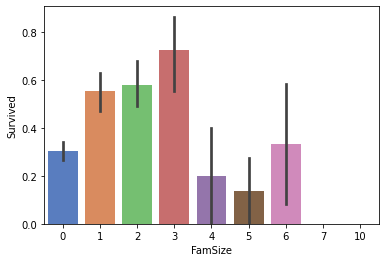

In [22]:
for col_name in train_categorical.columns:
    fig, ax = plt.subplots()
    sns.barplot(x = train_categorical.loc[:,col_name], y = train['Survived'], palette = 'muted')
    plt.show()

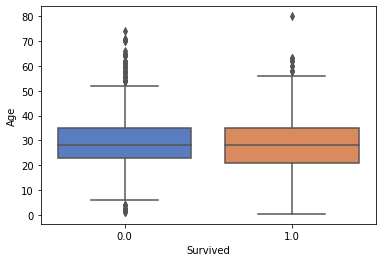

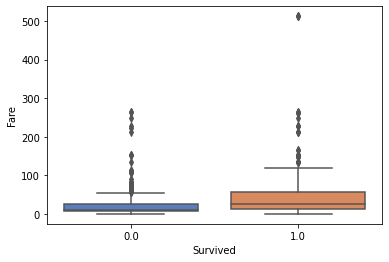

In [23]:
for col_name in train_numerical.columns:
    fig, ax = plt.subplots()
    sns.boxplot(y = train_numerical.loc[:,col_name], x = train['Survived'], palette = 'muted')
    plt.show()

In [24]:
for i, row in train.iterrows():
    if row['Sex'] == 'Female':
        train.loc[i, 'Sex'] = 0
    else:
        train.loc[i, 'Sex'] = 1
    if row['Embarked'] == 'C':
        train.loc[i, 'Embarked'] = 0
    elif row['Embarked'] == 'S':
        train.loc[i, 'Embarked'] = 1
    else:
        train.loc[i, 'Embarked'] = 2
    if row['Title'] == 'Common':
        train.loc[i, 'Title'] = 0
    else:
        train.loc[i, 'Title'] = 1

train['Sex'] = train['Sex'].astype('int64')
train['Embarked'] = train['Embarked'].astype('int64')
train['Title'] = train['Title'].astype('int64')

C:\Users\Mansi\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Mansi\AppData\Local\Temp/ipykernel_13684/2035568146.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Sex'] = train['Sex'].astype('int64')
C:\Users\Mansi\AppData\Local\Temp/ipykernel_13684/2035568146.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [25]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    int64  
 6   Title     891 non-null    int64  
 7   FamSize   891 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 94.9 KB


None

In [26]:
for i, row in test.iterrows():
    if row['Sex'] == 'Female':
        test.loc[i, 'Sex'] = 0
    else:
        test.loc[i, 'Sex'] = 1
    if row['Embarked'] == 'C':
        test.loc[i, 'Embarked'] = 0
    elif row['Embarked'] == 'S':
        test.loc[i, 'Embarked'] = 1
    else:
        test.loc[i, 'Embarked'] = 2
    if row['Title'] == 'Common':
        test.loc[i, 'Title'] = 0
    else:
        test.loc[i, 'Title'] = 1
        
test['Sex'] = test['Sex'].astype('int64')
test['Embarked'] = test['Embarked'].astype('int64')
test['Title'] = test['Title'].astype('int64')  

In [27]:
display(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   Fare      418 non-null    float64
 4   Embarked  418 non-null    int64  
 5   Title     418 non-null    int64  
 6   FamSize   418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.3 KB


None

In [28]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2021)

In [30]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((712, 7), (712,), (179, 7), (179,))

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 91 to 117
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   Fare      712 non-null    float64
 4   Embarked  712 non-null    int64  
 5   Title     712 non-null    int64  
 6   FamSize   712 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 44.5 KB


In [32]:
# Desicion Tree
tree_model = DecisionTreeClassifier(random_state = 2021)
tree_model.fit(X_train, y_train)
y_hat = tree_model.predict(X_test)

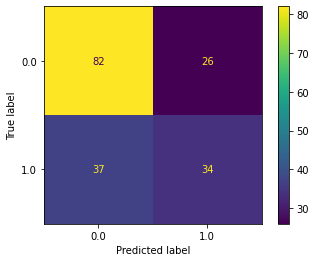

In [33]:
cm = confusion_matrix(y_test,y_hat)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_model.classes_)
disp.plot()


plt.show()

In [34]:
accuracy = accuracy_score(y_test, y_hat).round(2)
precision_tree = precision_score(y_test, y_hat).round(2)
recall_tree = recall_score(y_test, y_hat).round(2)
f1_tree = f1_score(y_test, y_hat).round(2)

In [35]:
accuracy


0.65